In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [5]:
data = sns.load_dataset("tips")

In [6]:
sns.get_dataset_names()

C:\Anaconda\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Anaconda\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [7]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
data.shape

(244, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [12]:
data.head()
#give starting 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [14]:
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [15]:
data.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [17]:
data[(data['sex'] == "Male") & (data['smoker'] == "Yes")].count()

total_bill    60
tip           60
sex           60
smoker        60
day           60
time          60
size          60
dtype: int64

In [21]:
data[(data['time'] == "Dinner") | (data['size'] == 2)].count()

total_bill    228
tip           228
sex           228
smoker        228
day           228
time          228
size          228
dtype: int64

In [22]:
data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [23]:
### 1. %tip of total_bill 

In [24]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
p = []
for i in range(len(data)):
    d = data.loc[i,['total_bill','tip']]
    per = round((d[1]/d[0])*100,2)
    p.append(per)

In [33]:
p[:5]

[5.94, 16.05, 16.66, 13.98, 14.68]

In [34]:
data['Percentage_bill'] = p

In [35]:
data

,total_bill,tip,sex,smoker,day,time,size,Percentage_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [36]:
data['Percentage_bill'].value_counts()

14.48    3
13.03    2
12.13    2
15.38    2
11.77    2
        ..
18.84    1
16.40    1
21.85    1
15.18    1
19.50    1
Name: Percentage_bill, Length: 226, dtype: int64

In [37]:
#2. avg tip per 100 customers

In [38]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,Percentage_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [ ]:
    8 --> 100 

In [41]:
data[:100]['tip'].mean()

3.059

In [42]:
# 100 customer including size 

In [49]:
s = 0
v = 0
for i,j in zip(data['size'],range(len(data))):
    v += i
    if v <= 100:
        s += i
    elif v > 100:
        break
print(j)

37


In [50]:
s

100

In [46]:
data[:37]

,total_bill,tip,sex,smoker,day,time,size,Percentage_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


In [53]:
data['size'][:10].sum()

28

In [ ]:
[100,100,100,rest of the customers]
[mean(tip),mean(tip),mean(tip),mean(tip)]

In [55]:
1000/100

10.0

In [ ]:
1 --> mean(tip)
2 --> mean(tip)
3 --> mean(tip)

In [57]:
s=99
for i in data['size']:  
    if s<100: 
        s+=i 
    else:
        break


In [58]:
s

101

In [70]:
i = data['size'].sum()//100
mean_tip = []
index = []
s = 0
i = 0
while i<len(data):  #this loop is for getting the index of the customers where they get 100
    if (s + data['size'][i]) <= 100:
        s += data['size'][i]
    if s == 100:
        index.append(i)
        s = 0
    i += 1
print(index)
for i in range(len(index)):
    if i == 0:
        mean_tip.append(data['tip'][:index[i]].mean())
    else:
        mean_tip.append(data['tip'][index[i-1]:index[i]].mean())
print(mean_tip)

[36, 82, 125, 222]
[3.008055555555556, 3.0206521739130445, 3.0772093023255818, 3.0597938144329904]


In [73]:
data['tip'][:36].mean()

3.008055555555556

In [74]:
data['tip'][36:82].mean()

3.0206521739130445

In [64]:
data['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [65]:
data['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [75]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,Percentage_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [76]:
#3. Which day more people arrive

In [77]:
data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [78]:
#4. Which time is more profitable lunch or dinner

In [79]:
data['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [81]:
data.groupby("time").count()

,total_bill,tip,sex,smoker,day,size,Percentage_bill
time,,,,,,,
Lunch,68,68,68,68,68,68,68
Dinner,176,176,176,176,176,176,176


In [82]:
data.groupby("time")
#returns the dataframe

In [83]:
data.groupby("time")['total_bill'].sum()
#returns the dataframe

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

In [84]:
#5. Comparision of bills of smoker and non smoker and who gives more tip ?

In [89]:
data.groupby("smoker")[['total_bill','tip']].mean()

,total_bill,tip
smoker,,
Yes,20.756344,3.008710
No,19.188278,2.991854


In [91]:
data.groupby("smoker")['sex'].value_counts()

smoker  sex   
Yes     Male      60
        Female    33
No      Male      97
        Female    54
Name: sex, dtype: int64

In [92]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,Percentage_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [ ]:
#6. in which day and time couples are come

In [96]:
data[data['size'] == 2]['day'].value_counts()

Sat     53
Thur    48
Sun     39
Fri     16
Name: day, dtype: int64

In [97]:
data[data['size'] == 2]['time'].value_counts()

Dinner    104
Lunch      52
Name: time, dtype: int64

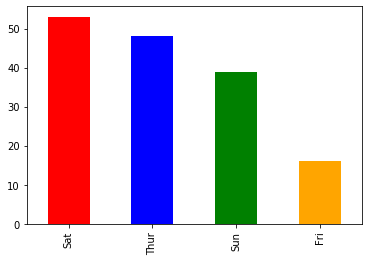

In [100]:
data[data['size'] == 2]['day'].value_counts().plot(kind="bar",color=['red','blue','green','orange'])

In [101]:
#7. On which Day and Time Sale is more

In [103]:
data.groupby("day")['total_bill'].sum()

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [104]:
data.groupby("time")['total_bill'].sum()

time
Lunch     1167.47
Dinner    3660.30
Name: total_bill, dtype: float64

In [ ]:
#8. In which time more male come

In [108]:
data[data['sex'] == "Male"]['time'].value_counts() 

Dinner    124
Lunch      33
Name: time, dtype: int64

In [109]:
#9. gender where total_bill greater avg total_bill

In [117]:
data['total_bill'].mean()

19.785942622950824

In [115]:
data[data['total_bill'] > data['total_bill'].mean()][['sex','total_bill']]

,sex,total_bill
2,Male,21.01
3,Male,23.68
4,Female,24.59
5,Male,25.29
7,Male,26.88
...,...,...
237,Male,32.83
238,Female,35.83
239,Male,29.03
240,Female,27.18


In [119]:
data[data['total_bill'] > data['total_bill'].mean()]['sex'].value_counts()

Male      71
Female    28
Name: sex, dtype: int64

In [120]:
#10. What % of total tip is recieved from female cutomers & from male customer ?

In [123]:
data.groupby("sex")['tip'].sum()/ data['tip'].sum()

sex
Male      0.663044
Female    0.336956
Name: tip, dtype: float64

In [124]:
#11. who comes in group male or female 
#answer???

In [128]:
data[data['size'] > 2]['sex'].value_counts()

Male      58
Female    26
Name: sex, dtype: int64

In [130]:
#seaborn --> iris, titanic, exercise,

In [131]:
#groupby, apply, drop

In [134]:
data.groupby("size").count()

,total_bill,tip,sex,smoker,day,time,Percentage_bill
size,,,,,,,
1,4,4,4,4,4,4,4
2,156,156,156,156,156,156,156
3,38,38,38,38,38,38,38
4,37,37,37,37,37,37,37
5,5,5,5,5,5,5,5
6,4,4,4,4,4,4,4


In [140]:
data.groupby("sex")['size'].sum()

sex
Male      413
Female    214
Name: size, dtype: int64

In [ ]:
### 7 : 10pm
